In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
df = pd.read_csv('DelayFlights_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


### Nivell 1

- Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

- Exercici 2

Crea una nova variable segons si el vol ha arribat tard o no (ArrDelay > 0).


In [5]:
# 0 means no delay, 1 means delay
df['target']=df['ArrDelay'].apply(lambda x: 0 if x <0 else 1)

In [6]:
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,1
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,1


In [7]:
df.target.value_counts(normalize=True)

1    0.904214
0    0.095786
Name: target, dtype: float64

+ data shows 90.4% of observations with delay (label 1)  and 9.6 % observation without delay (label 0)
+ imbalance dataset
+ si tenemos accuracy alrededor del 90% sera un resultado poco fiable debido a este imbalance


- Exercici 3

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [15]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
model4 = LinearSVC()

In [10]:
X= df[['ActualElapsedTime','DepDelay','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
y = df['target']

In [12]:
def analyze_clasification_model(model,X,y):
    print(model)
    model.fit(X,y)    
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y,y_pred,normalize='true')
    print(conf_matrix)
    print(f'Accuracy : {accuracy_score(y,y_pred)}')
    print(f'Precision : {precision_score(y,y_pred)}')
    print(f'recall (sensitivity) : {recall_score(y,y_pred)}')
    print(f'ROC - AUC: {roc_auc_score(y,y_pred)}')
    
    plot_confusion_matrix(model,X,y,normalize='true')
    

LogisticRegression()
[[0.26418795 0.73581205]
 [0.01752239 0.98247761]]
Accuracy : 0.9136755601712695
Precision : 0.926494855953792
recall (sensitivity) : 0.9824776065371525
ROC - AUC: 0.6233327807297234


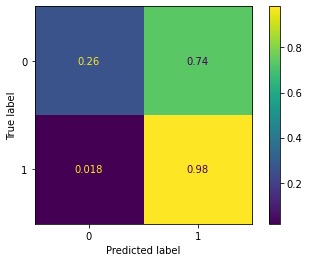

In [11]:
analyze_clasification_model(model1,X,y)

KNeighborsClassifier()
[[0.54411376 0.45588624]
 [0.02571527 0.97428473]]
Accuracy : 0.9330804022562442
Precision : 0.9527729837873844
recall (sensitivity) : 0.9742847310045561
ROC - AUC: 0.759199246597183


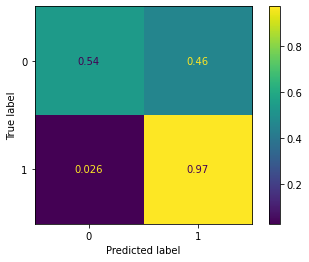

In [16]:
analyze_clasification_model(model2,X,y)

DecisionTreeClassifier()
[[0.85415507 0.14584493]
 [0.02446907 0.97553093]]
Accuracy : 0.963904829433037
Precision : 0.9844096229181186
recall (sensitivity) : 0.9755309292959605
ROC - AUC: 0.9148430016740883


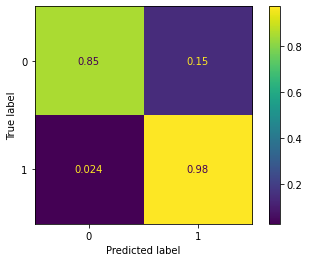

In [12]:
analyze_clasification_model(model3,X,y)

LinearSVC()


/home/vant/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[[0.89109968 0.10890032]
 [0.15548006 0.84451994]]
Accuracy : 0.8489816266946194
Precision : 0.9865241108869187
recall (sensitivity) : 0.8445199427451373
ROC - AUC: 0.8678098125888798


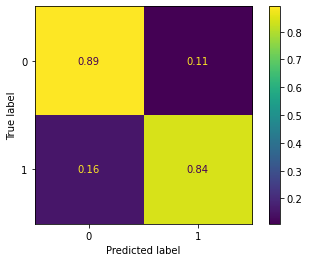

In [13]:
analyze_clasification_model(model4,X,y)
# does not seem to work this model with the current settings

- Exercici 4

Entrena’ls utilitzant els diferents paràmetres que admeten.



In [ ]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
model4 = LinearSVC()

- Exercici 5

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

### Nivell 2

- Exercici 6

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

### Nivell 3

- Exercici 7

No utilitzis la variable DepDelay a l’hora de fer prediccions